In [69]:
import sklearn
import numpy as np
import pandas as pd
import os
import tarfile
import urllib
# To plot pretty figures
%matplotlib inline

import matplotlib.pyplot as plt
import urllib.request
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sb

In [70]:
df=pd.read_csv('../../data/dataset/original_datasets/heart_2020_cleaned.csv')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [72]:
df.duplicated().sum()

18078

## Removing Duplicates

In [73]:
df.drop_duplicates(inplace=True)


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  object 
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  object 
 3   AlcoholDrinking   301717 non-null  object 
 4   Stroke            301717 non-null  object 
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  object 
 8   Sex               301717 non-null  object 
 9   AgeCategory       301717 non-null  object 
 10  Race              301717 non-null  object 
 11  Diabetic          301717 non-null  object 
 12  PhysicalActivity  301717 non-null  object 
 13  GenHealth         301717 non-null  object 
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  object 
 16  KidneyDisease     301717 

In [75]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [76]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  object 
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  object 
 3   AlcoholDrinking   301717 non-null  object 
 4   Stroke            301717 non-null  object 
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  object 
 8   Sex               301717 non-null  object 
 9   AgeCategory       301717 non-null  object 
 10  Race              301717 non-null  object 
 11  Diabetic          301717 non-null  object 
 12  PhysicalActivity  301717 non-null  object 
 13  GenHealth         301717 non-null  object 
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  object 
 16  KidneyDisease     301717 

In [78]:
df_matrix = df.corr(numeric_only=True)

In [79]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,7.084559
std,6.468134,8.140656,8.128288,1.467122
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.410000,0.000000,0.000000,7.000000
75%,31.650000,2.000000,4.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


<Axes: >

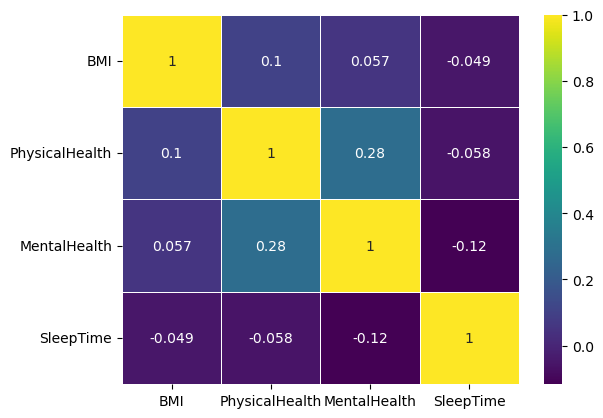

In [80]:
sb.heatmap(df_matrix,annot=True,cmap='viridis',linewidths=.5)

In [81]:
bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]  
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity 1', 'Obesity 2', 'Obesity 3'] 

In [82]:
heart_disease_count = df['HeartDisease'].value_counts()
heart_disease_count


HeartDisease
No     274456
Yes     27261
Name: count, dtype: int64

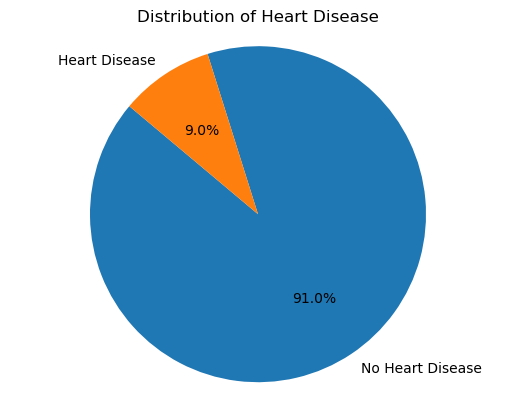

In [83]:
# Count the occurrences of each class
counts = df['HeartDisease'].value_counts()
# Create the pie chart
plt.pie(counts, labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%', startangle=140)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
# Set the title
plt.title('Distribution of Heart Disease')
# Show the plot
plt.show()

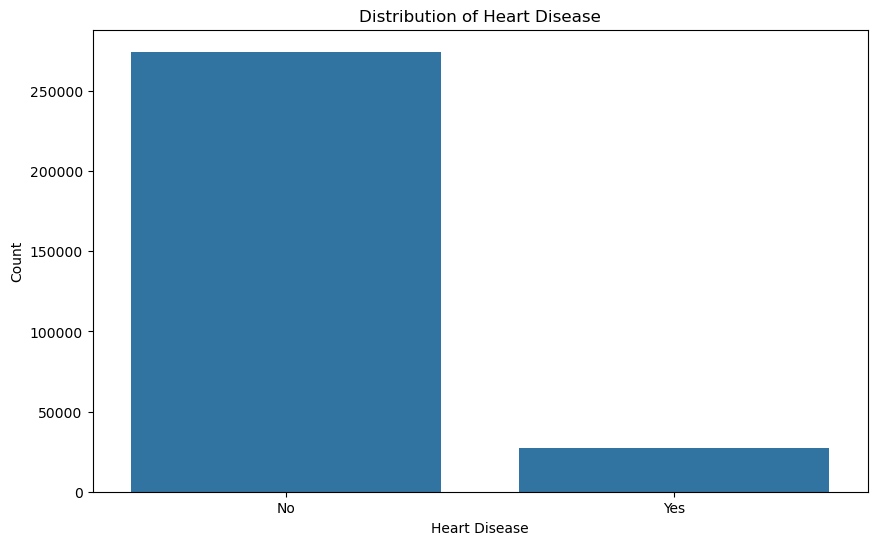

In [84]:
heart_disease_count = df['HeartDisease'].value_counts()

plt.figure(figsize=(10, 6))

# Create the bar plot using seaborn
sb.countplot(x='HeartDisease', data=df)  # Use countplot for easier plotting

plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.xticks([0, 1], ['No' , 'Yes'])  # Set x-axis labels for clarity
plt.show()

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  object 
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  object 
 3   AlcoholDrinking   301717 non-null  object 
 4   Stroke            301717 non-null  object 
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  object 
 8   Sex               301717 non-null  object 
 9   AgeCategory       301717 non-null  object 
 10  Race              301717 non-null  object 
 11  Diabetic          301717 non-null  object 
 12  PhysicalActivity  301717 non-null  object 
 13  GenHealth         301717 non-null  object 
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  object 
 16  KidneyDisease     301717 

In [86]:
df['Diabetic'] = df['Diabetic'].replace({
    'No, borderline diabetes': 'No',
    'Yes (during pregnancy)': 'Yes'
})

In [87]:
import matplotlib.pyplot as plt

In [88]:
df1=df.copy()

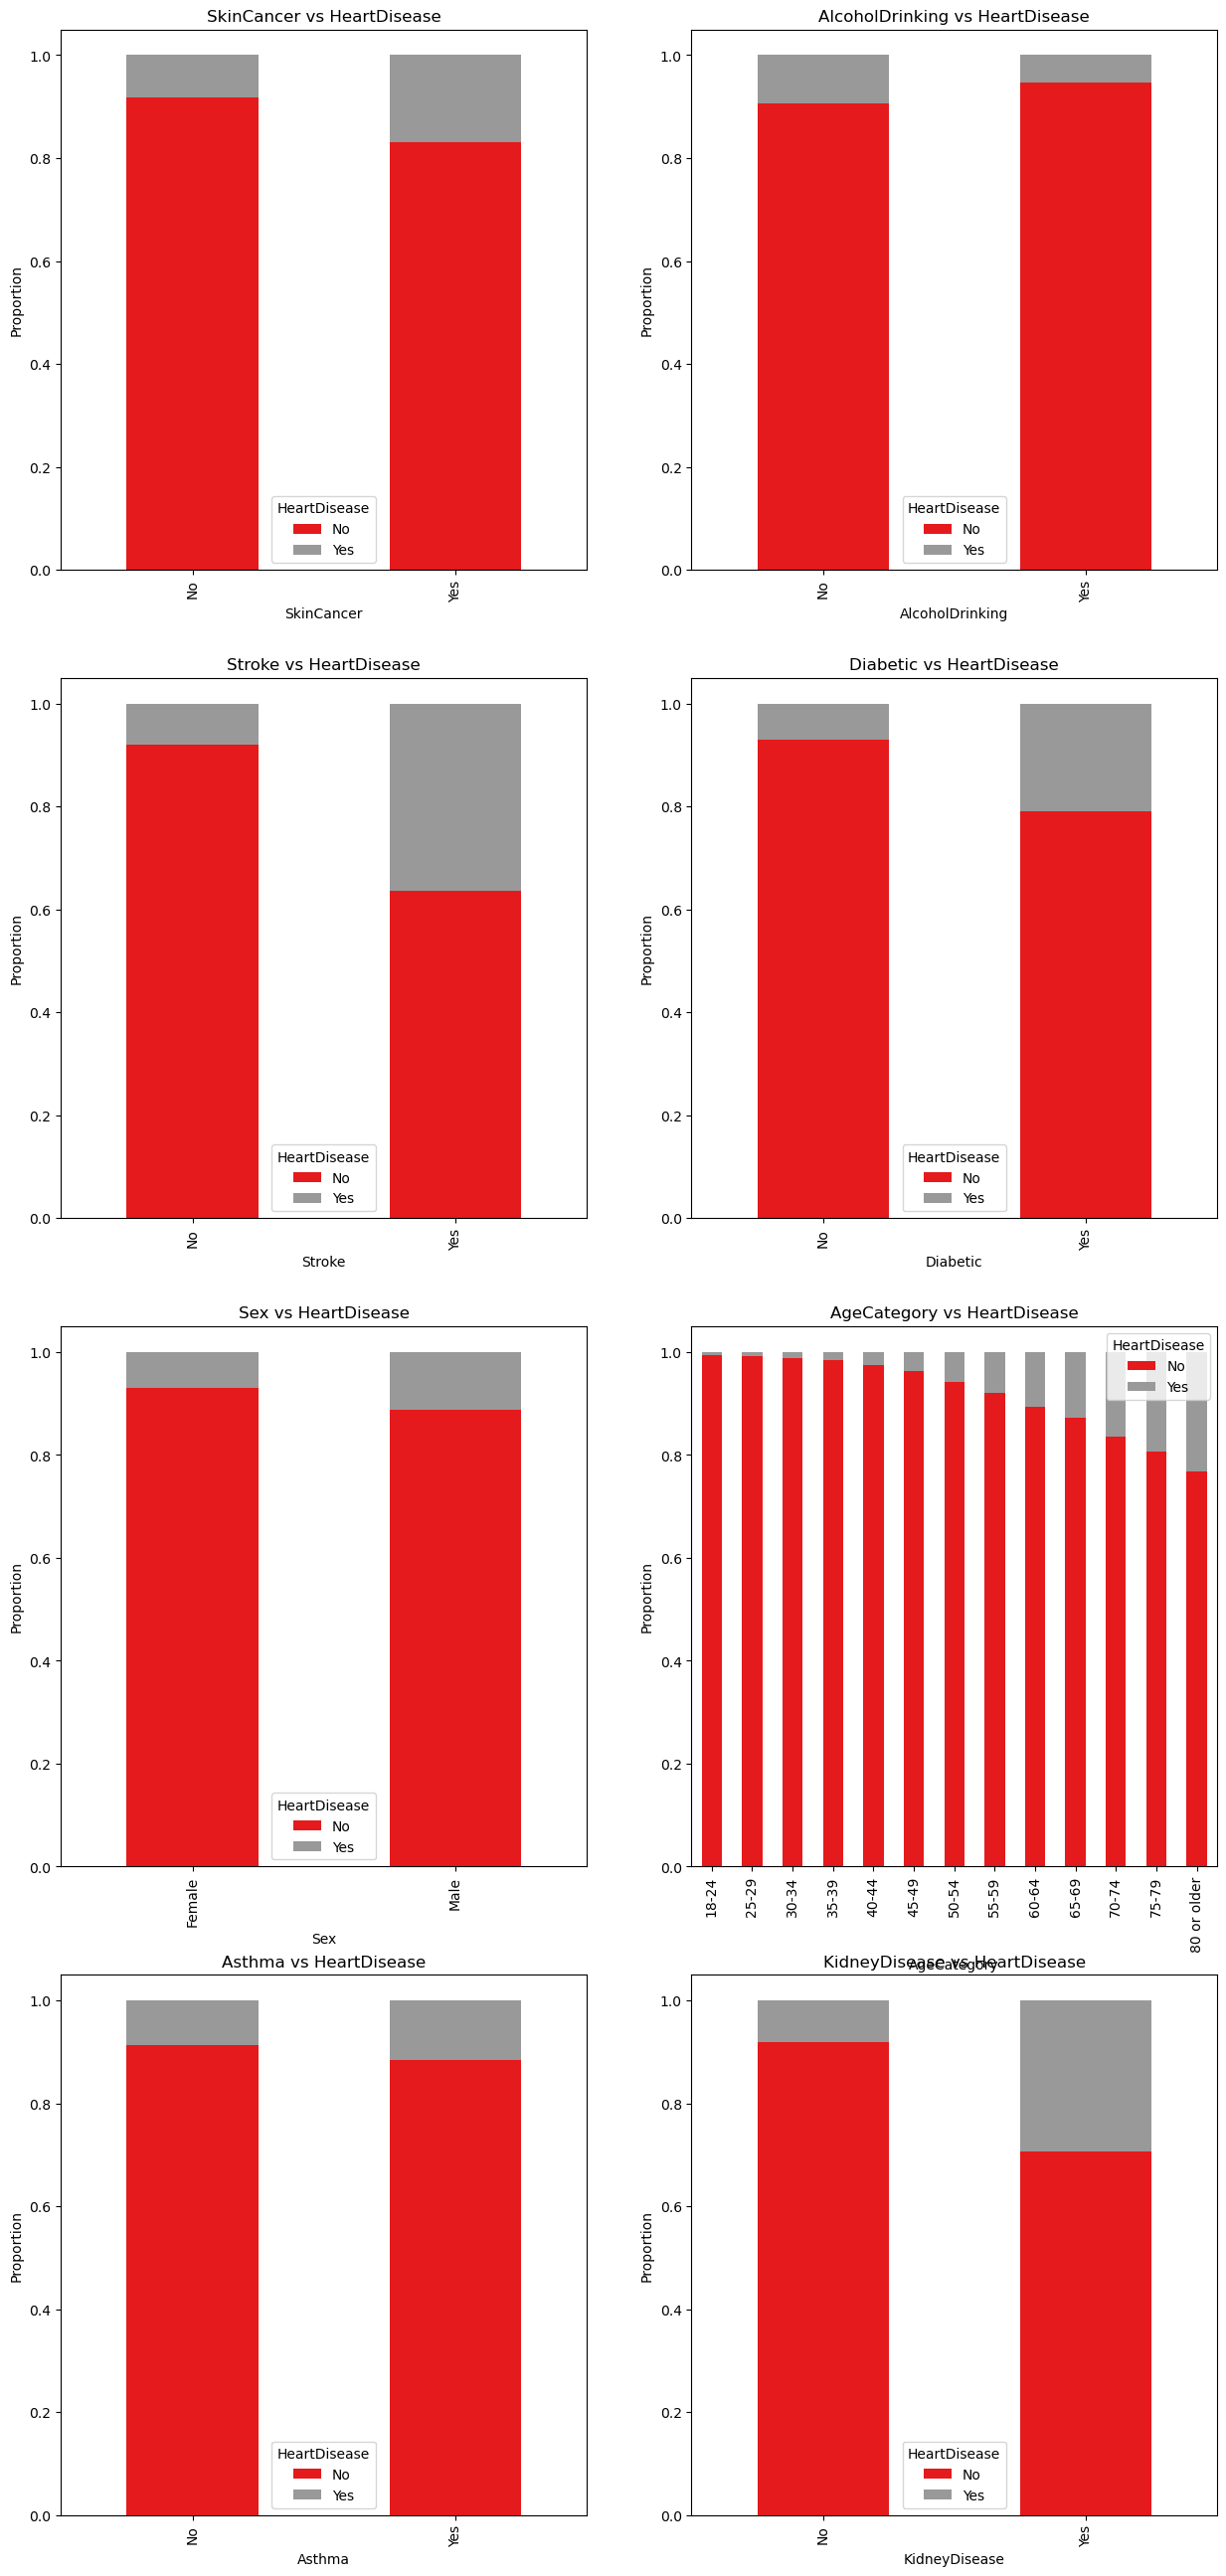

In [91]:
def stacked_bar(data, feature, target, ax, color_palette='tab20'):
  crosstab = pd.crosstab(data[feature], data[target], normalize='index')
  crosstab.plot(kind='bar', stacked=True, ax=ax, colormap=color_palette)
  ax.set_title(f'{feature} vs {target}')
  ax.set_ylabel('Proportion')

# Set up the figure
fig, axes = plt.subplots(4, 2, figsize=(15, 25))

# Color palette selection (optional)
color_palette = 'Set1' 

# Plot each feature
stacked_bar(df, 'SkinCancer', 'HeartDisease', axes[0, 0], color_palette=color_palette)
stacked_bar(df, 'AlcoholDrinking', 'HeartDisease', axes[0, 1], color_palette=color_palette)
stacked_bar(df, 'Stroke', 'HeartDisease', axes[1, 0], color_palette=color_palette)
stacked_bar(df, 'Diabetic', 'HeartDisease', axes[1, 1], color_palette=color_palette)
stacked_bar(df, 'Sex', 'HeartDisease', axes[2, 0], color_palette=color_palette)
stacked_bar(df, 'AgeCategory', 'HeartDisease', axes[2, 1], color_palette=color_palette)
stacked_bar(df, 'Asthma', 'HeartDisease', axes[3, 0], color_palette=color_palette)
stacked_bar(df, 'KidneyDisease', 'HeartDisease', axes[3, 1], color_palette=color_palette)
# Adjust layout
plt.subplots_adjust(bottom=2, top=3)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder as LE
encoder=LE()

In [ ]:
for col in df1.columns:
    if df1[col].dtype == 'object':
        df1[col] = encoder.fit_transform(df1[col])

        # Print the mapping between original categories and assigned numerical values
        print(f"Column: {col}")
        print(f"Mapping: {dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))}\n")

Column: HeartDisease
Mapping: {'No': 0, 'Yes': 1}

Column: Smoking
Mapping: {'No': 0, 'Yes': 1}

Column: AlcoholDrinking
Mapping: {'No': 0, 'Yes': 1}

Column: Stroke
Mapping: {'No': 0, 'Yes': 1}

Column: DiffWalking
Mapping: {'No': 0, 'Yes': 1}

Column: Sex
Mapping: {'Female': 0, 'Male': 1}

Column: AgeCategory
Mapping: {'18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4, '45-49': 5, '50-54': 6, '55-59': 7, '60-64': 8, '65-69': 9, '70-74': 10, '75-79': 11, '80 or older': 12}

Column: Race
Mapping: {'American Indian/Alaskan Native': 0, 'Asian': 1, 'Black': 2, 'Hispanic': 3, 'Other': 4, 'White': 5}

Column: Diabetic
Mapping: {'No': 0, 'Yes': 1}

Column: PhysicalActivity
Mapping: {'No': 0, 'Yes': 1}

Column: GenHealth
Mapping: {'Excellent': 0, 'Fair': 1, 'Good': 2, 'Poor': 3, 'Very good': 4}

Column: Asthma
Mapping: {'No': 0, 'Yes': 1}

Column: KidneyDisease
Mapping: {'No': 0, 'Yes': 1}

Column: SkinCancer
Mapping: {'No': 0, 'Yes': 1}



In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  int64  
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  int64  
 3   AlcoholDrinking   301717 non-null  int64  
 4   Stroke            301717 non-null  int64  
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  int64  
 8   Sex               301717 non-null  int64  
 9   AgeCategory       301717 non-null  int64  
 10  Race              301717 non-null  int64  
 11  Diabetic          301717 non-null  int64  
 12  PhysicalActivity  301717 non-null  int64  
 13  GenHealth         301717 non-null  int64  
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  int64  
 16  KidneyDisease     301717 

In [ ]:
df2=df1.copy()
df1_matrix = df1.corr(numeric_only=True)
df1.to_csv('heart_2020_final.csv')

## Data Distribution

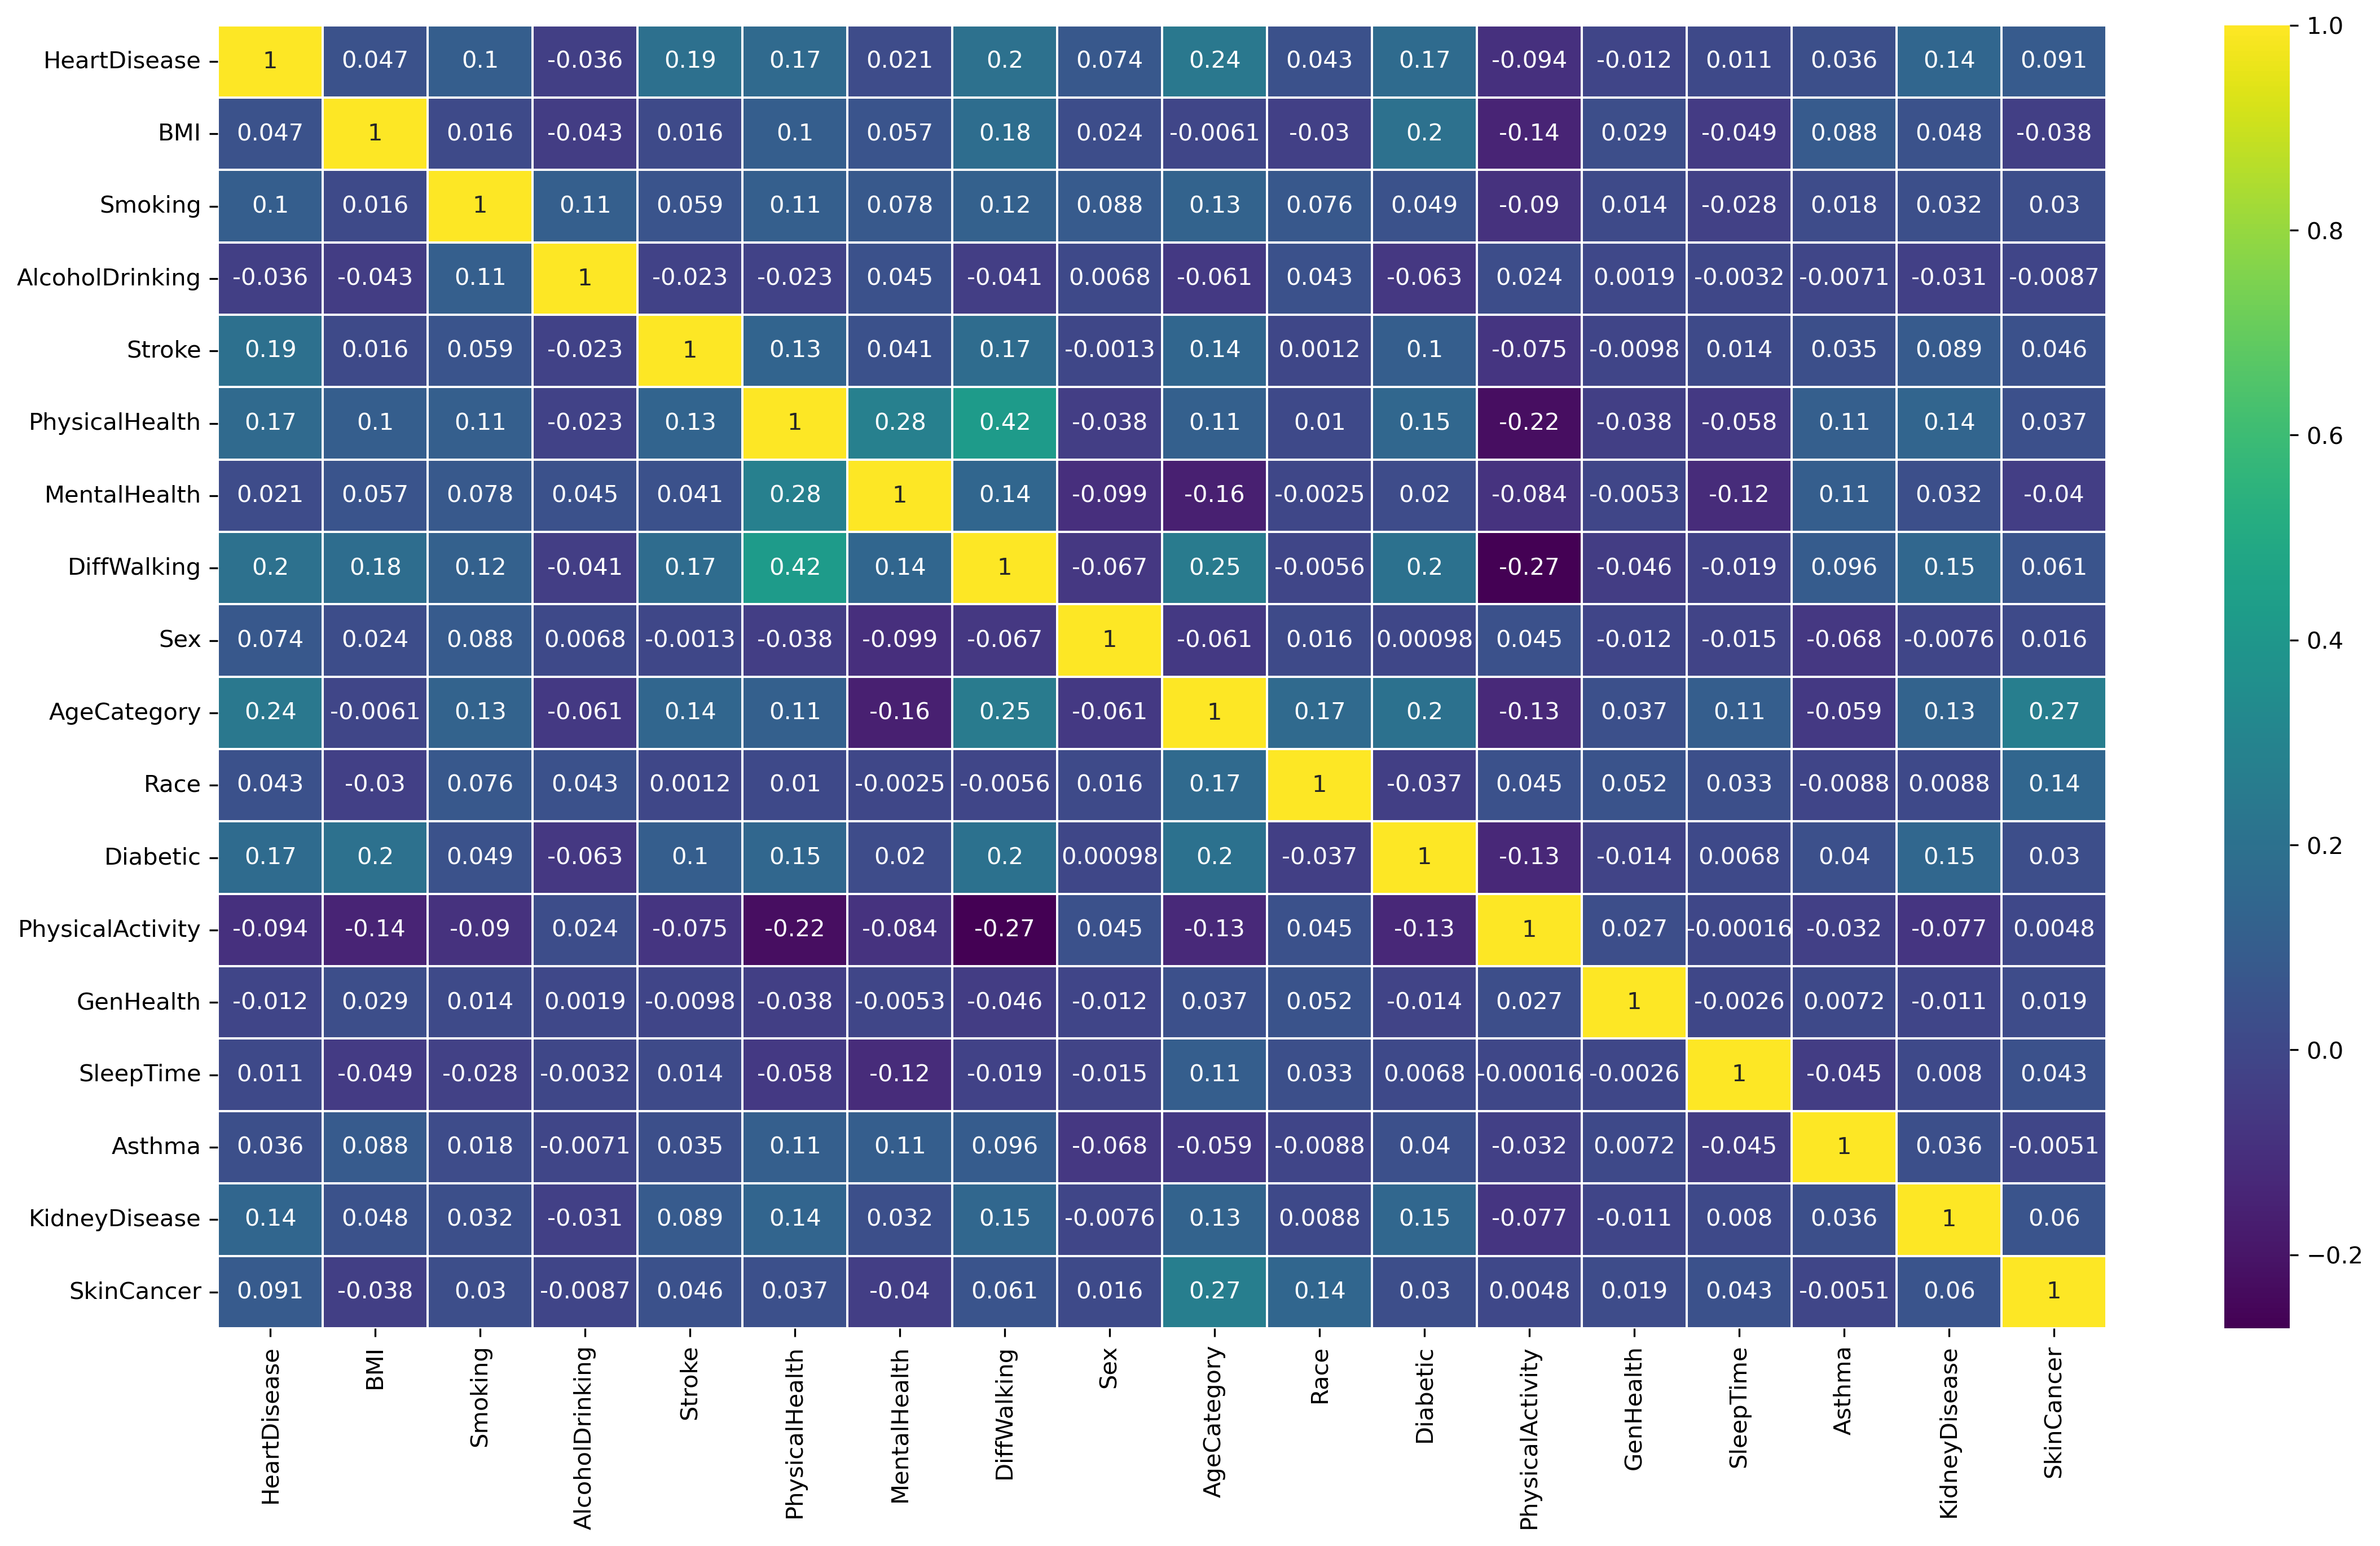

In [ ]:
plt.figure(figsize=(18, 10), dpi=300)
sb.heatmap(df1_matrix, annot=True, cmap='viridis', linewidths=.5)
plt.show()

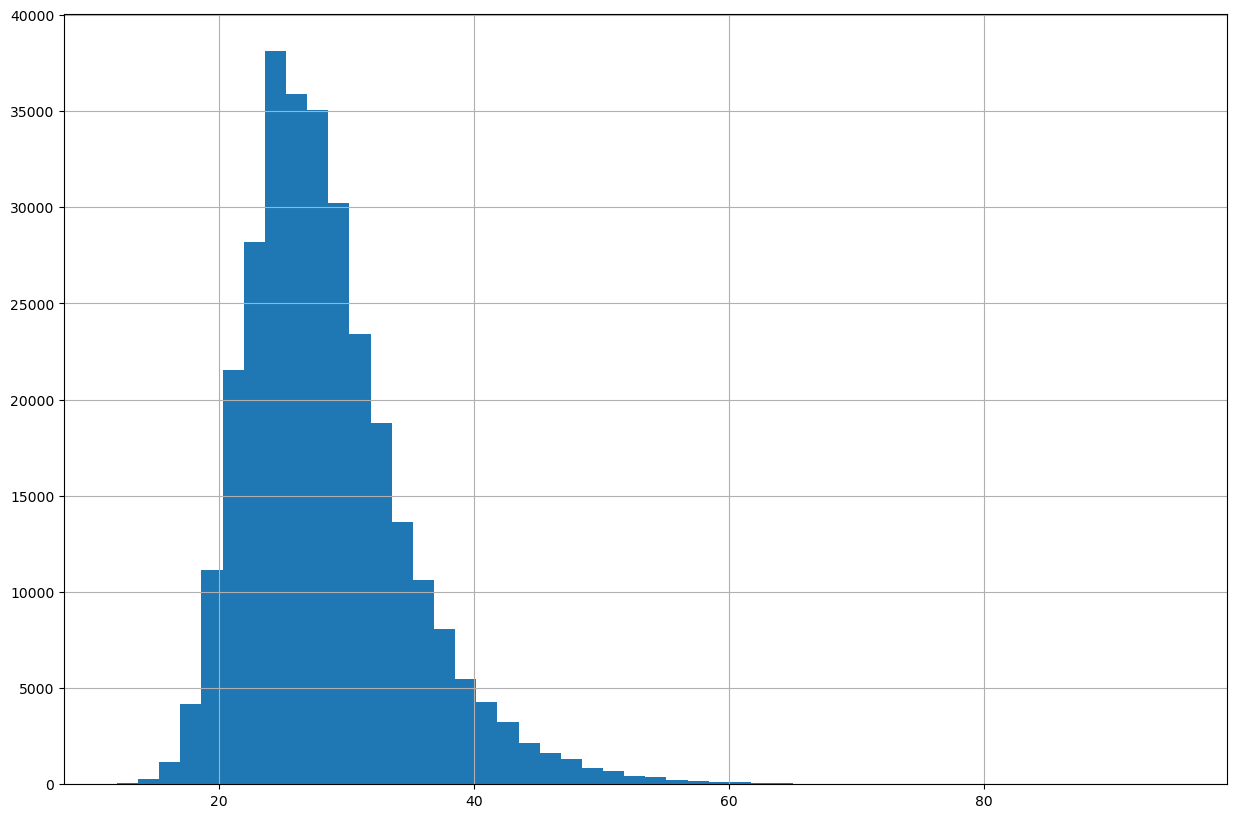

In [ ]:
df1['BMI'].hist(bins=50, figsize=(15,10))
plt.show()

In [ ]:
X = df.drop("HeartDisease", axis=1)  # Features
y = df["HeartDisease"]  # Target

In [ ]:
rus = RandomUnderSampler(random_state=42)  # Set random seed for reproducibility
X_resampled, y_resampled = rus.fit_resample(X, y)

In [ ]:
print("Class distribution after undersampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after undersampling:
HeartDisease
No     27261
Yes    27261
Name: count, dtype: int64


In [ ]:
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['HeartDisease'] = y_resampled

In [ ]:
resampled_matrix = resampled_df.corr(numeric_only=True)

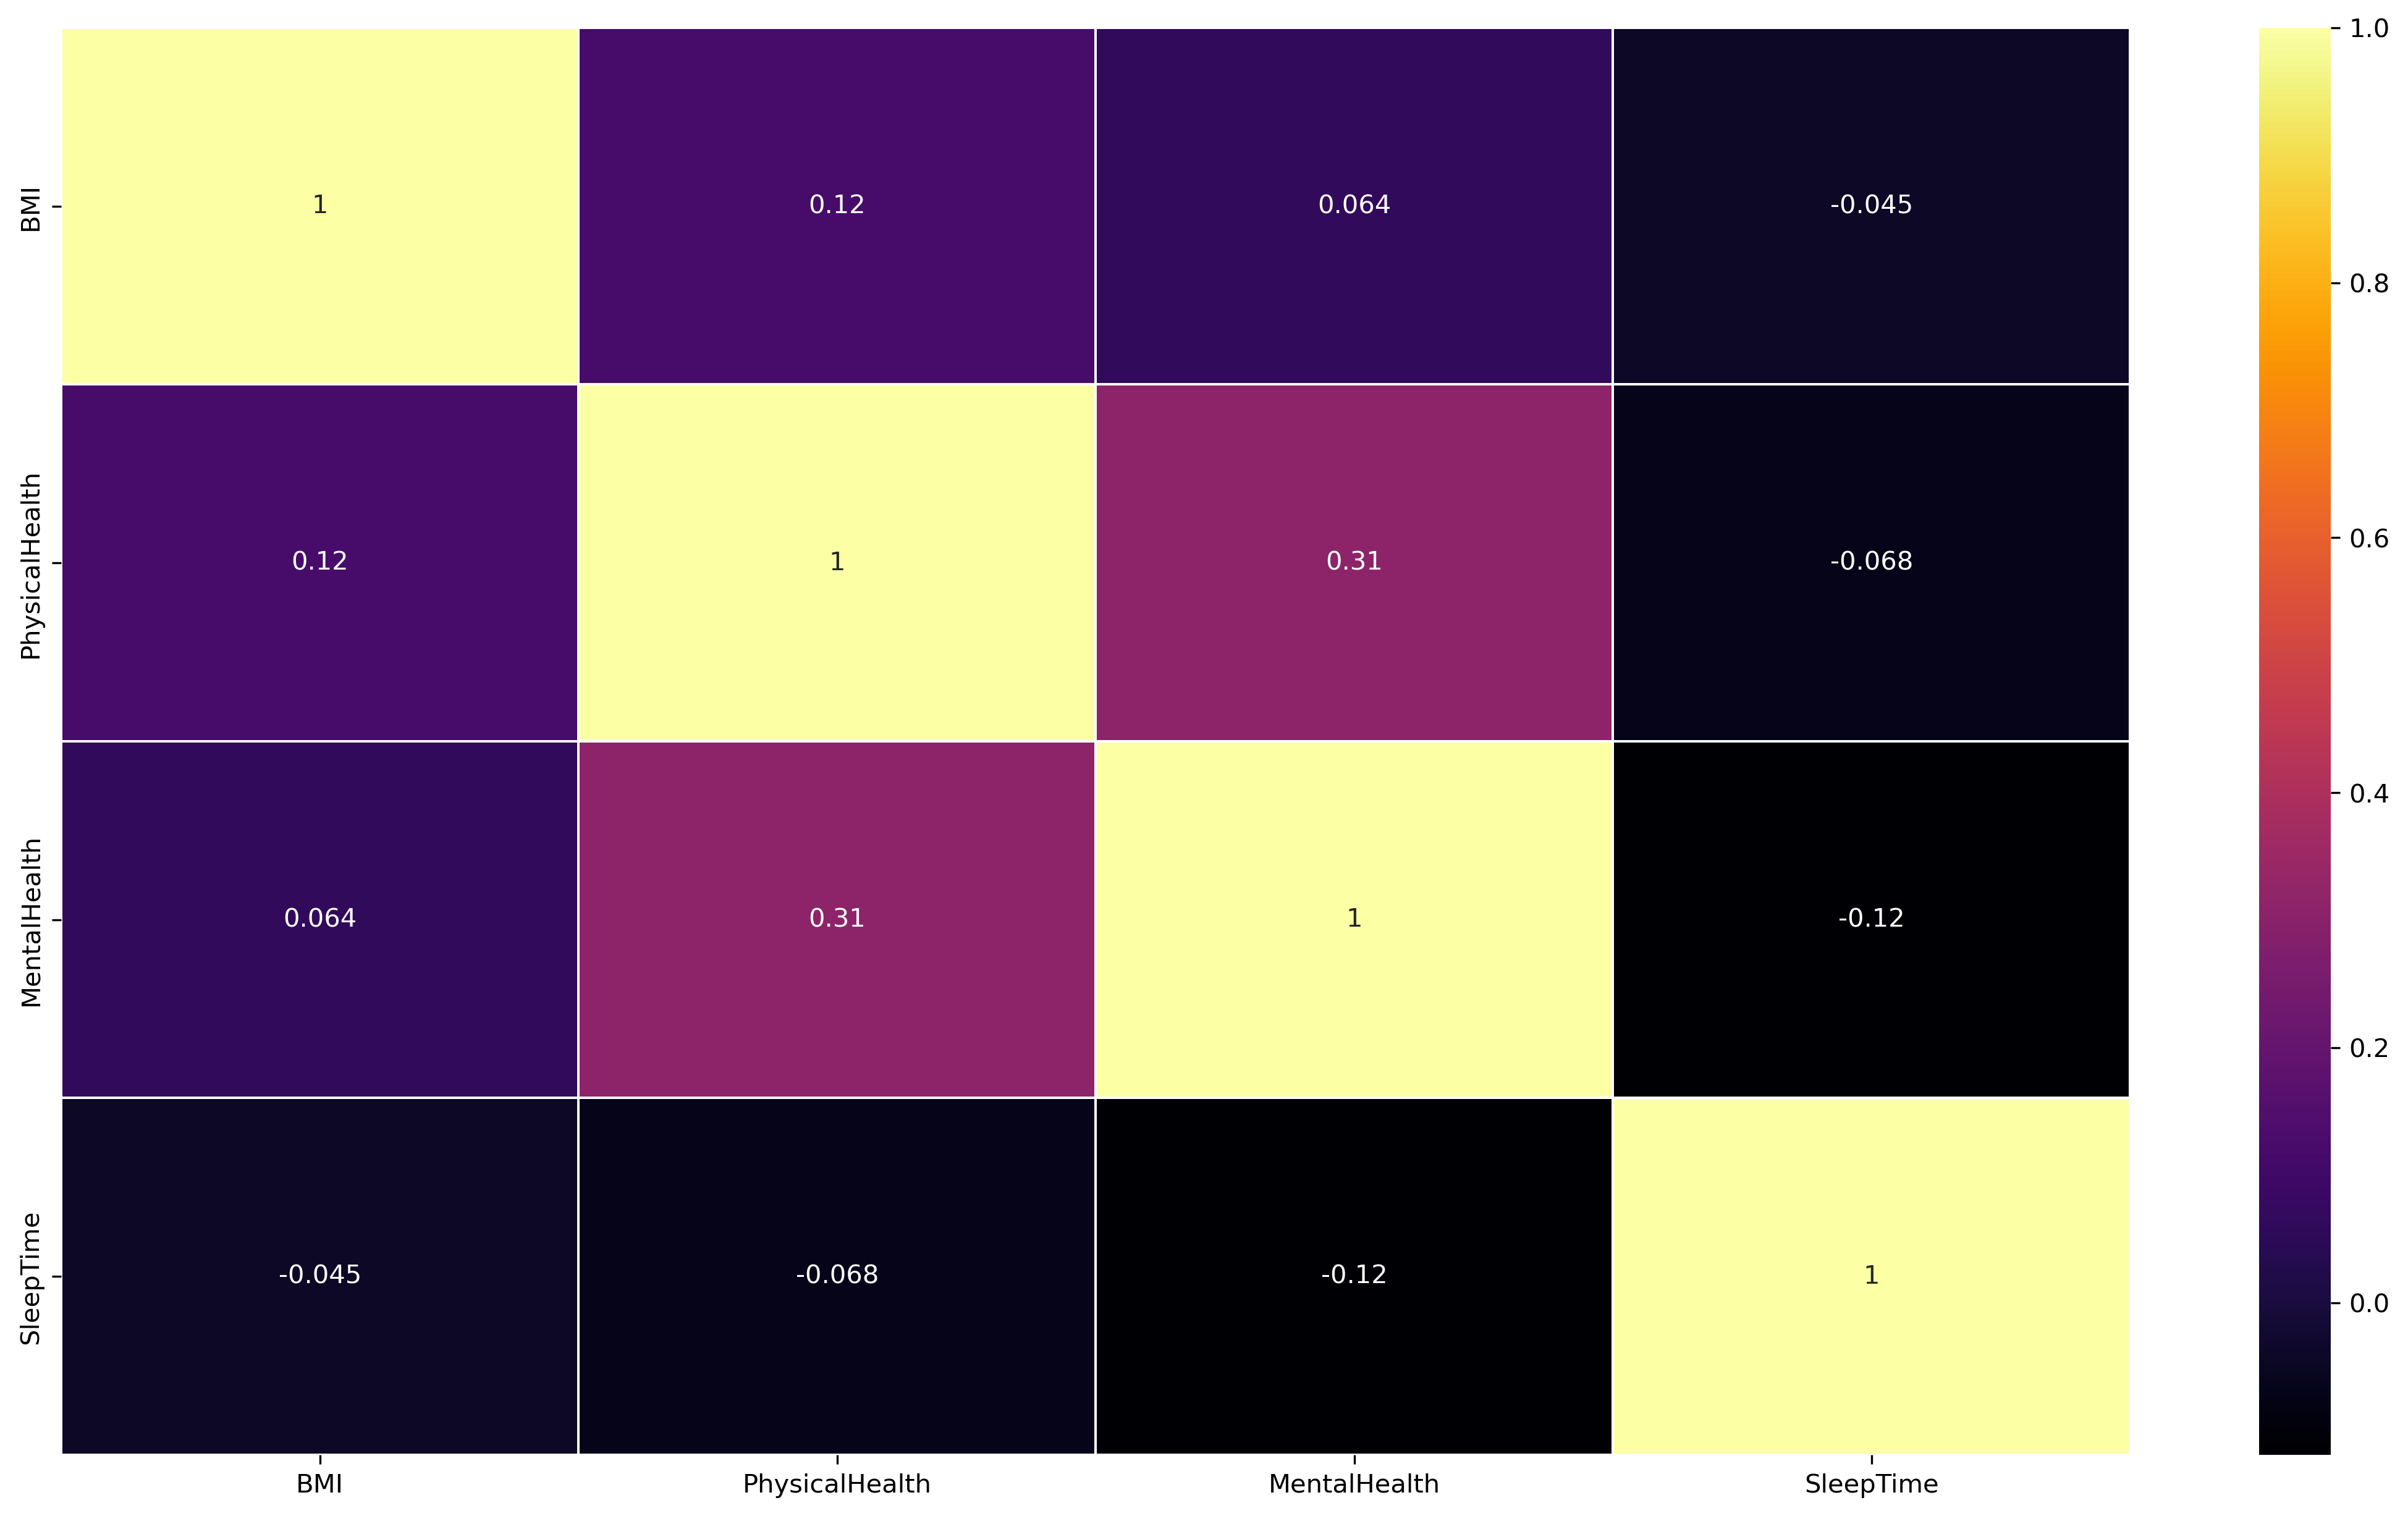

In [ ]:
plt.figure(figsize=(18, 10), dpi=300)
sb.heatmap(resampled_matrix, annot=True, cmap='inferno', linewidths=.5)
plt.show()

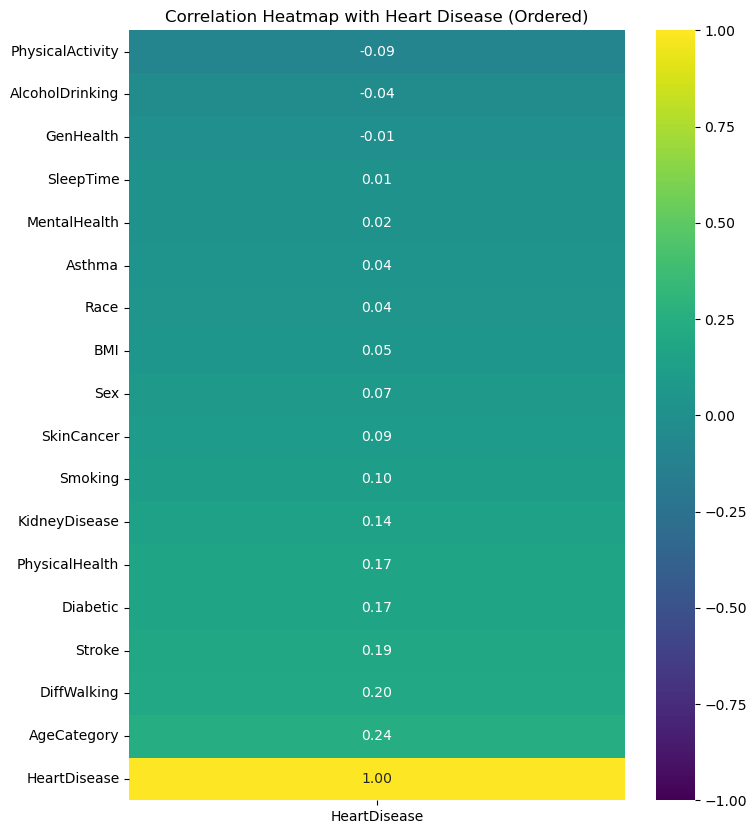

In [ ]:
correlation_matrix = df1.corr(numeric_only=True)
Heart_Disease_correlation = correlation_matrix['HeartDisease'].sort_values(ascending=True)
ordered_correlation_matrix = correlation_matrix.loc[Heart_Disease_correlation.index, Heart_Disease_correlation.index]
plt.figure(figsize=(8, 10))
sb.heatmap(ordered_correlation_matrix[['HeartDisease']], annot=True,cmap='viridis', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap with Heart Disease (Ordered)')
plt.show()

In [ ]:
correlation1_matrix = resampled_df.corr(numeric_only=True)
Heart_Disease_correlation = correlation1_matrix['HeartDisease'].sort_values(ascending=True)
ordered_correlation_matrix = correlation1_matrix.loc[Heart_Disease_correlation.index, Heart_Disease_correlation.index]
plt.figure(figsize=(8, 10))
sb.heatmap(ordered_correlation_matrix[['HeartDisease']], annot=True,cmap='inferno', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap with Heart Disease (Ordered & Resampled)')
plt.show()

KeyError: 'HeartDisease'

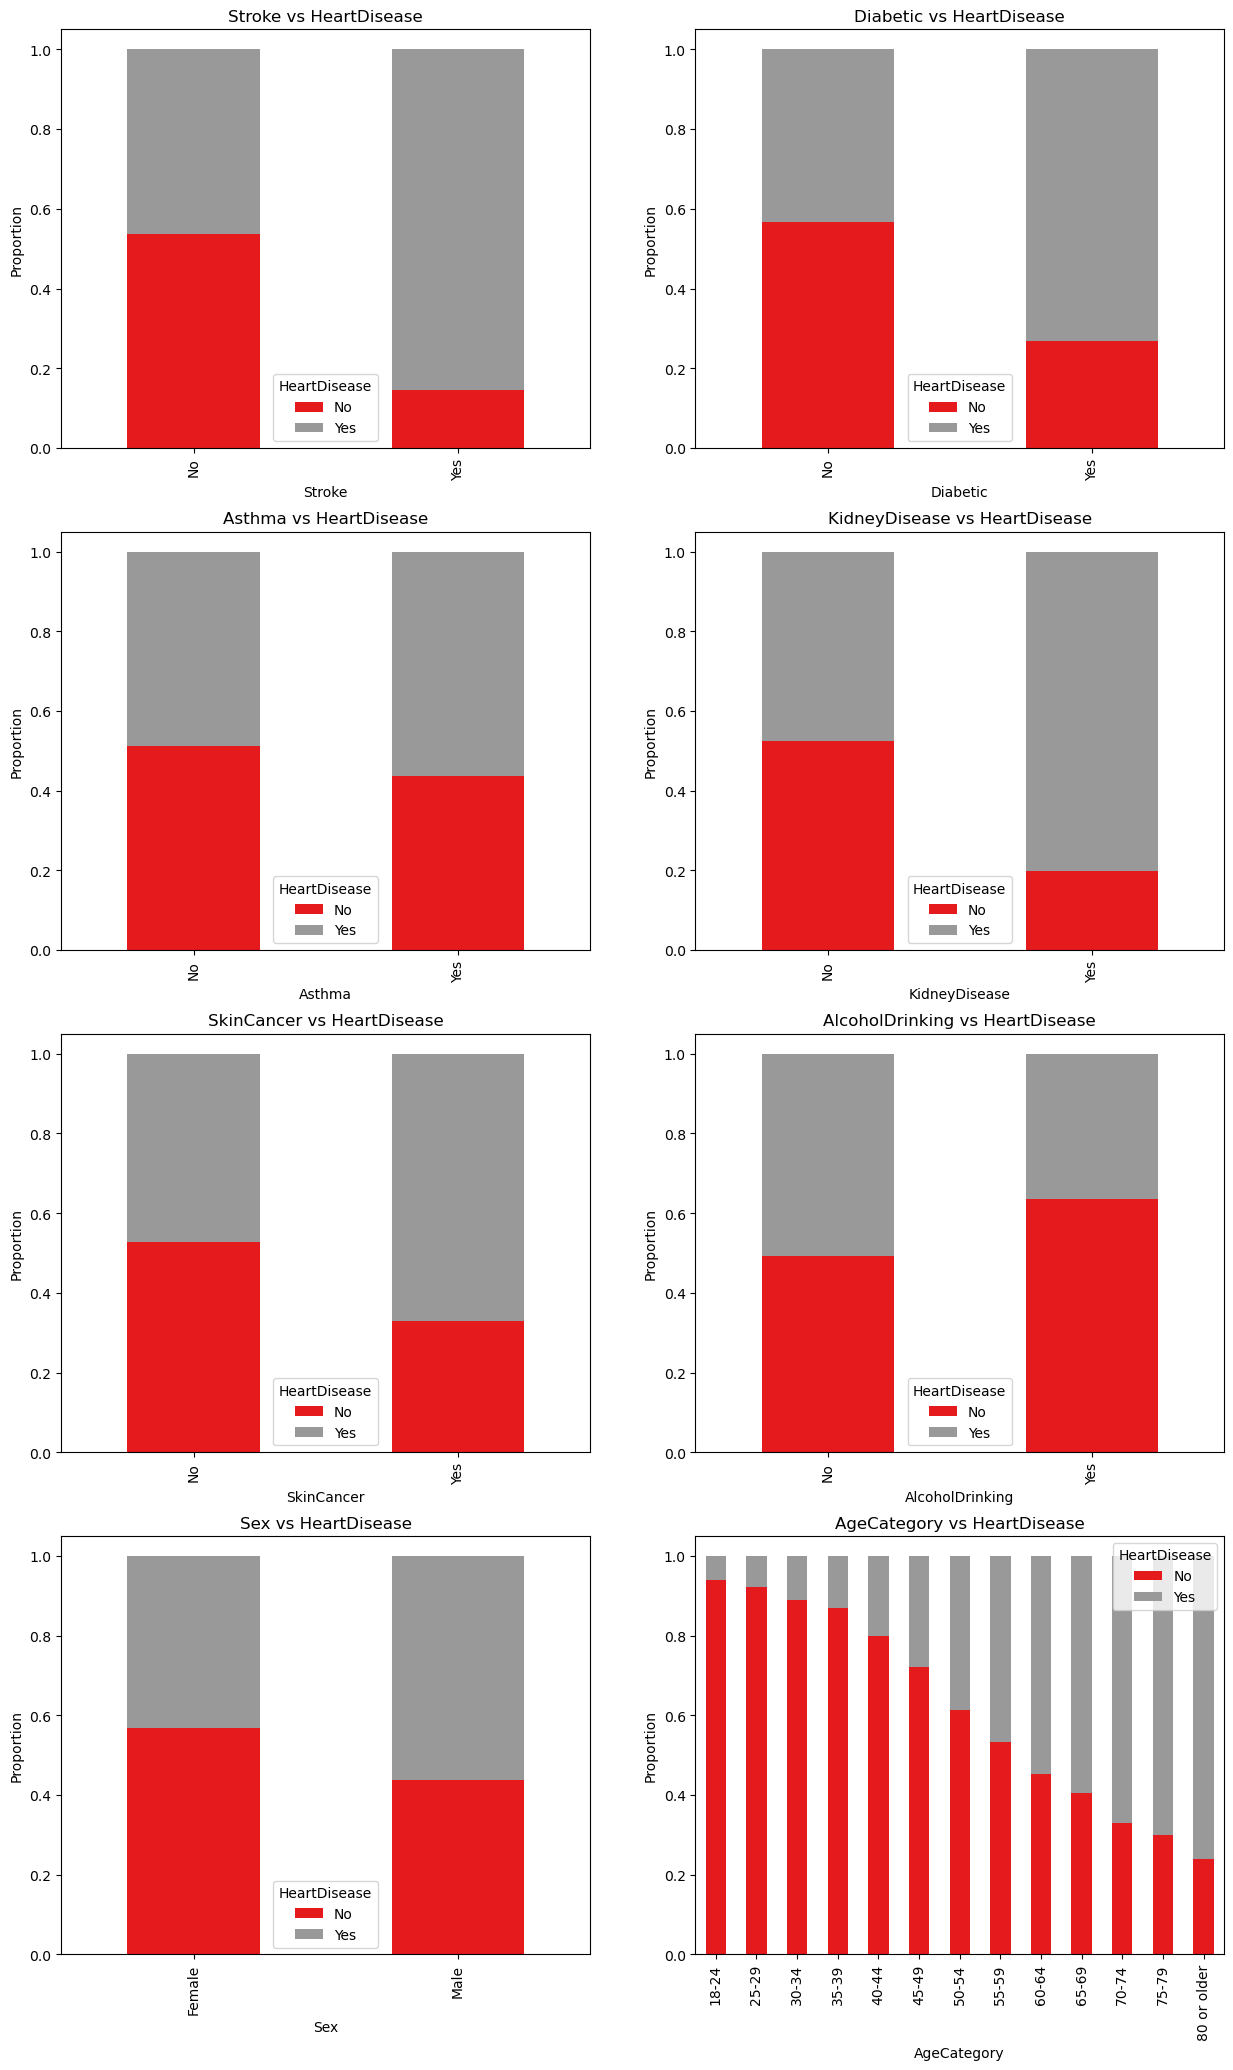

In [ ]:
def stacked_bar(data, feature, target, ax, color_palette='tab20'):
  crosstab = pd.crosstab(data[feature], data[target], normalize='index')
  crosstab.plot(kind='bar', stacked=True, ax=ax, colormap=color_palette)
  ax.set_title(f'{feature} vs {target}')
  ax.set_ylabel('Proportion')

# Set up the figure
fig, axes = plt.subplots(4, 2, figsize=(15, 25))

# Color palette selection (optional)
color_palette = 'Set1' 

# Plot each feature
stacked_bar(resampled_df, 'SkinCancer', 'HeartDisease', axes[2, 0], color_palette=color_palette)
stacked_bar(resampled_df, 'AlcoholDrinking', 'HeartDisease', axes[2, 1], color_palette=color_palette)
stacked_bar(resampled_df, 'Stroke', 'HeartDisease', axes[0, 0], color_palette=color_palette)
stacked_bar(resampled_df, 'Diabetic', 'HeartDisease', axes[0, 1], color_palette=color_palette)
stacked_bar(resampled_df, 'Sex', 'HeartDisease', axes[3, 0], color_palette=color_palette)
stacked_bar(resampled_df, 'AgeCategory', 'HeartDisease', axes[3, 1], color_palette=color_palette)
stacked_bar(resampled_df, 'Asthma', 'HeartDisease', axes[1, 0], color_palette=color_palette)
stacked_bar(resampled_df, 'KidneyDisease', 'HeartDisease', axes[1, 1], color_palette=color_palette)
# Adjust layout
plt.show()